In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, roc_curve
from xgboost import XGBClassifier


In [2]:
import pandas as pd  

# Load the dataset  
data = pd.read_csv("Customer churn Data.csv")

In [5]:
# Check the shape of the dataset  
print(data.shape)  # Outputs number of rows and columns  


(11260, 19)


In [6]:
# Display the first few rows of the dataset  
data.head()  # Shows the first five rows of the DataFrame  


,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,160,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,121,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,130,Mobile


In [10]:
# Checking dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [13]:
# Handling missing values for numerical columns
numerical_cols = ['Tenure', 'CC_Contacted_LY', 'Service_Score', 'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly', 'Day_Since_CC_connect', 'cashback']
for col in numerical_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to numeric
    data[col].fillna(data[col].median(), inplace=True)  # Impute with median


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4696\2012650125.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)  # Impute with median


In [15]:
# Handling missing values for categorical columns
categorical_cols = ['Payment', 'Gender', 'account_segment', 'Marital_Status', 'Login_device']
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)  # Impute with mode
    data[col] = data[col].astype(str)  # Convert to string before encoding


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4696\3286392864.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)  # Impute with mode
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4696\3286392864.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

# Project Note 2: 

In [17]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix, roc_curve)




In [19]:
# Data Preprocessing
X = data.drop(columns=['Churn'])  # Features
y = data['Churn']  # Target variable

\

In [21]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns



In [23]:
# Handling missing values & Encoding categorical features
for col in categorical_cols:
    X[col] = X[col].replace({'#': np.nan})
    X[col].fillna('Unknown', inplace=True)
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True, dtype=float)
X.fillna(X.mean(), inplace=True)



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4696\1709676810.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna('Unknown', inplace=True)


In [25]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [27]:
# Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_train_scaled_df.fillna(X_train_scaled_df.mean(), inplace=True)
X_test_scaled_df.fillna(X_test_scaled_df.mean(), inplace=True)



In [29]:
# Balancing Dataset using SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled_df, y_train)



In [31]:
# Feature Selection using Random Forest
feature_selector = RandomForestClassifier(n_estimators=100, random_state=42)
feature_selector.fit(X_train_balanced, y_train_balanced)
feature_importances = pd.Series(feature_selector.feature_importances_, index=X_train_balanced.columns)
selected_features = feature_importances[feature_importances > 0.01].index  # Important features
X_train_balanced = X_train_balanced[selected_features]
X_test_scaled_df = X_test_scaled_df[selected_feat\ures]



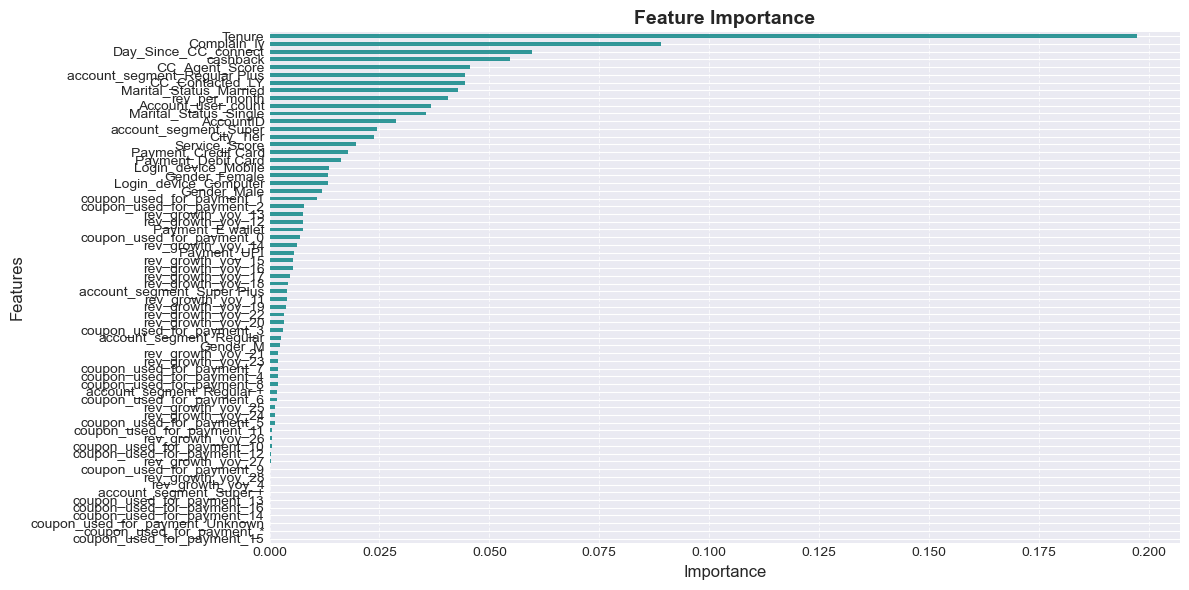

In [32]:
# Visualization: Feature Importance
plt.style.use("seaborn-v0_8-darkgrid")  # Clean style
plt.figure(figsize=(12, 6))
feature_importances.sort_values().plot(kind='barh', color='teal', alpha=0.8)
plt.title('Feature Importance', fontsize=14, fontweight='bold')
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)  # Rotate to avoid overlap
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent text cutting
plt.show()


In [33]:
# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}



In [34]:
# Train & Evaluate models
def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    results = []
    model_performance = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)
        results.append([name, f1, auc])
        model_performance[name] = f1
    return results, model_performance



In [36]:
# Get results
results_balanced, performance_balanced = train_and_evaluate(models, X_train_balanced, y_train_balanced, X_test_scaled_df, y_test)



C:\Users\ADMIN\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:29:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [37]:
# Convert to DataFrame
results_df = pd.DataFrame(results_balanced, columns=["Model", "F1-Score", "AUC-ROC"])
print(results_df.sort_values(by=["AUC-ROC"], ascending=False))



               Model  F1-Score   AUC-ROC
0      Random Forest  0.888268  0.989685
1            XGBoost  0.875171  0.987300
3                SVM  0.742934  0.946942
2  Gradient Boosting  0.712251  0.930763


In [38]:
# Best Model Selection
best_model_name = max(performance_balanced, key=performance_balanced.get)
best_model = models[best_model_name]



In [42]:
# Hyperparameter Tuning
param_grid = {
    "Random Forest": {'n_estimators': [100, 200], 'max_depth': [10, 20]},
    "XGBoost": {'learning_rate': [0.01, 0.1], 'n_estimators': [100, 200]},
    "Gradient Boosting": {'learning_rate': [0.01, 0.1], 'n_estimators': [100, 200]},
    "SVM": {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}
if best_model_name in param_grid:
    grid_search = GridSearchCV(best_model, param_grid[best_model_name], cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train_balanced, y_train_balanced)
    best_model = grid_search.best_estimator_
    print(f"Best Parameters for {best_model_name}: {grid_search.best_params_}")



Best Parameters for Random Forest: {'max_depth': 20, 'n_estimators': 200}


In [43]:
# Save Best Model
with open("best_churn_model.pkl", "wb") as model_file:
    pickle.dump(best_model, model_file)
    print("Best model saved successfully!")



Best model saved successfully!


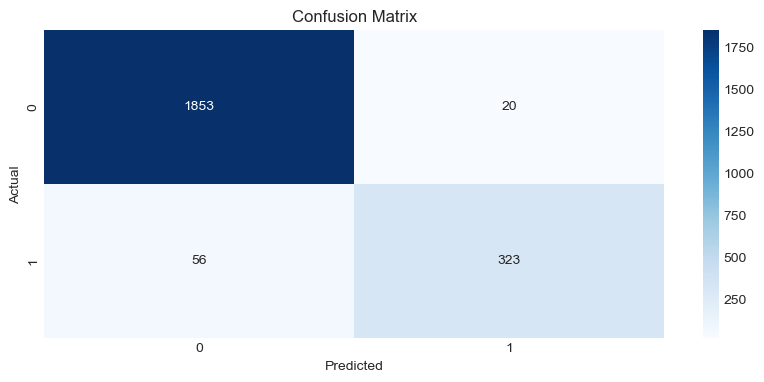

In [44]:
# Confusion Matrix & ROC Curve
plt.figure(figsize=(10, 4))
y_pred_best = best_model.predict(X_test_scaled_df)
y_prob_best = best_model.predict_proba(X_test_scaled_df)[:, 1]
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



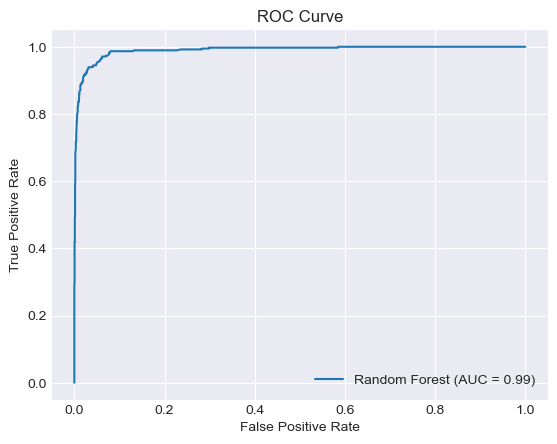

In [45]:
fpr, tpr, _ = roc_curve(y_test, y_prob_best)
plt.plot(fpr, tpr, label=f"{best_model_name} (AUC = {roc_auc_score(y_test, y_prob_best):.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [46]:

# Final Model Prediction Function
def load_and_predict(model_path, X_new):
    with open(model_path, "rb") as model_file:
        loaded_model = pickle.load(model_file)
    return loaded_model.predict(X_new)



In [47]:
# Example Prediction
predictions = load_and_predict("best_churn_model.pkl", X_test_scaled_df)
print("Predictions:", predictions[:10])



Predictions: [0 0 0 0 0 0 1 0 0 0]


In [48]:
# Final Model Performance Table
print(results_df)


               Model  F1-Score   AUC-ROC
0      Random Forest  0.888268  0.989685
1            XGBoost  0.875171  0.987300
2  Gradient Boosting  0.712251  0.930763
3                SVM  0.742934  0.946942
